# One Neuron for your water Consumption

## Water Function
Calculate your water

In [61]:
WATER = lambda DAY_TIME, WORKOUT_TIME : DAY_TIME * 0.2 - 1.4 + WORKOUT_TIME * 0.5

In [78]:
X = np.linspace(7, 20, 14)
Y = np.linspace(0, 7, 8)
X, Y = np.meshgrid(X, Y)
Z = X * 0.2 - 1.4 + Y * 0.5

In [54]:
X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2+Y**2))

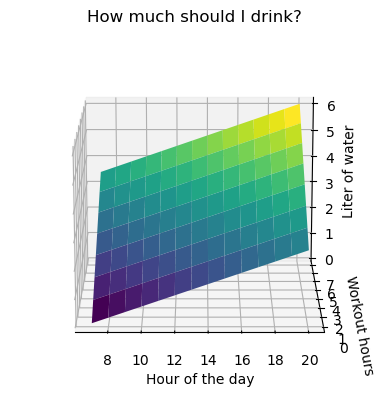

In [96]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_title('How much should I drink?')
ax.set_xlabel('Hour of the day')
ax.set_ylabel('Workout hours')
ax.set_zlabel('Liter of water')

ax.view_init(15, -90, 0)

plt.show()

## Build Architecture

In [21]:
import random
np.random.seed(0)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

## Create Trainingsdata

array([[<Axes: title={'center': 'x'}>]], dtype=object)

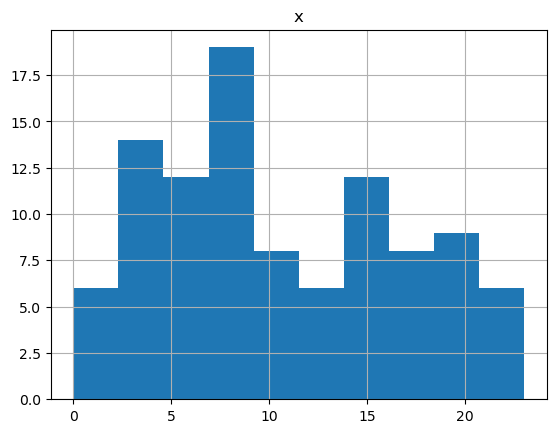

In [20]:
n = 100 # Number of samples

trainings_vec = list()
for i in range(100) :
    hour = int(random.random() * 24)
    trainings_vec.append(
        [ hour, water_intake(hour)]
    )

training_df = pd.DataFrame( columns=['x', 'y'], data=trainings_vec )
training_df.hist(column='x')

## Synthetic Neuron

In [34]:
# configuration
learning_rate = 0.01

## preset/initials
# initial weights
w1, w2 = 0, 0

# initial bias
bias = 0

In [145]:
## Neuron Function
# Activation Function ReLU (Rectified Linear Unit)
def ReLU(x) :
    return max(0, x)

# Inner neuron
def compute_neuron(X, W, bias) :
    return np.dot(X, W) + bias
    #return ReLU( y_ )

# Loss (Error)
def compute_loss(Y_true, Y_pred) :
    return np.mean( (Y_true - Y_pred) ** 2 )

# Gradients for Learning
def compute_gradients(X, Y_true, Y_pred, W, bias) :
    dW = -2 * np.dot(X.T, (Y_true - Y_pred) / len(X))
    dB = -2 * np.sum(Y_true - Y_pred) / len(X)
    return dW, dB

# Update the weights
def update_weights(W, bias, dW, dB, learning_rate) :
    W    -= learning_rate * dW
    bias  = -0.07#-= learning_rate * dB
    return W, bias

In [38]:
# Sample dataset
X = np.array([[0.1, 0.2], [0.2, 0.2], [0.3, 0.4], [0.4, 0.5]])  # Inputs
Y = np.array([0.3, 0.25, 0.5, 0.6])  # Outputs

# Initialize weights and bias
weights = np.random.rand(2)  # Two weights for two input features
bias = np.random.rand()

# Training parameters
learning_rate = 0.01
epochs = 1000

# Training loop
for epoch in range(epochs):
    # Compute neuron output
    Y_pred = compute_neuron(X, weights, bias)

    # Compute loss
    loss = compute_loss(Y, Y_pred)

    # Compute gradients
    dW, dB = compute_gradients(X, Y, Y_pred, weights, bias)

    # Update weights and bias
    weights, bias = update_weights(weights, bias, dW, dB, learning_rate)

    # Optionally, print the loss at certain intervals
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Final weights and bias
print("Final weights:", weights)
print("Final bias:", bias)


Epoch 0, Loss: 0.3561002286704672
Epoch 100, Loss: 0.00518427884976644
Epoch 200, Loss: 0.002068397125816359
Epoch 300, Loss: 0.001981927601382197
Epoch 400, Loss: 0.0019269284089095803
Epoch 500, Loss: 0.0018768591217248668
Epoch 600, Loss: 0.0018310568500582915
Epoch 700, Loss: 0.0017891238969328016
Epoch 800, Loss: 0.0017507013432426714
Epoch 900, Loss: 0.0017154636849737795
Final weights: [0.46871729 0.54456693]
Final bias: 0.11935726526622259


In [156]:
sample_count = 10

x1 = list()
x2 = list()
y = list()

for i in range(sample_count) :
    x1.append( random.random() * (20-7) + 7 )
    x2.append( random.random() * 7)
    y.append( WATER(x1[-1], x2[-1]) )

X = np.vstack((np.array(x1), np.array(x2))).T
Y = np.array(y)

/var/folders/s6/_crsxw5j2vs9d74jm7vlb0ch0000gn/T/ipykernel_11818/3457341073.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x1, x2, y, cmap='viridis')


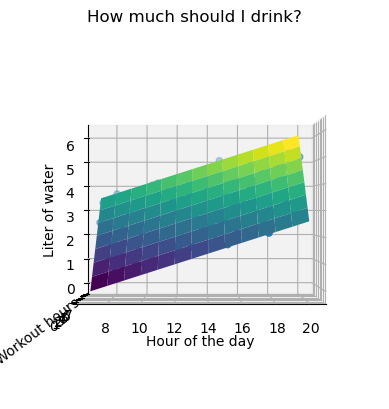

In [121]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.scatter(x1, x2, y, cmap='viridis')

ax.set_title('How much should I drink?')
ax.set_xlabel('Hour of the day')
ax.set_ylabel('Workout hours')
ax.set_zlabel('Liter of water')

ax.view_init(0, -90, 0)

plt.show()

In [124]:
np.array(x1)

array([14.7837601 ,  8.57751362,  7.56419048,  8.75030894,  8.05554298,
       15.51708712,  9.86275211, 10.73185025, 11.35664909, 19.72301437,
       16.97422085, 18.78922021, 19.26103782, 17.61175294, 14.21707353,
        9.34642491, 18.40378503, 12.30932217,  8.02840165, 12.04926002,
       14.67498648, 15.74270913, 17.12778792,  8.62040755, 10.54960848,
       13.88535743, 17.30450792, 15.46974059, 13.23350527, 15.46005575,
        8.78953074, 12.56947281, 17.38015444, 15.05423921, 14.165006  ,
        7.11811458, 15.0764402 , 14.11363634, 11.71129639, 15.5098474 ,
       17.56917356, 14.87103139,  9.56441621, 18.48121241, 18.36080927,
       13.00612983, 15.82726109, 13.68337346, 18.36613818, 11.43072928,
       12.77805846, 17.3128268 ,  8.31291045, 19.19117787,  7.16474421,
       17.79491139,  7.99492382,  8.02184979,  8.4506601 , 19.91321253,
       15.15574514, 13.5885005 ,  8.58741649, 12.64858044,  7.78448677,
       16.93864411,  8.63031518, 16.24341584,  8.77152584, 18.23

In [228]:
X /= 20
Y /= 20

# Initialize weights and bias
weights = np.random.rand(2)  # Two weights for two input features
bias = np.random.rand()

# Training parameters
learning_rate = 0.01
epochs = 1000

weight_history = list()
loss_history   = list()

# Training loop
for epoch in range(epochs):
    # Compute neuron output
    Y_pred = compute_neuron(X, weights, bias)

    # Compute loss
    loss = compute_loss(Y, Y_pred)

    # Compute gradients
    dW, dB = compute_gradients(X, Y, Y_pred, weights, bias)

    # Update weights and bias
    weights, bias = update_weights(weights, bias, dW, dB, learning_rate)
    # Optionally, print the loss at certain intervals
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")
        print(weights)
        weight_history.append((weights[0], weights[1]))
        loss_history.append(loss)

# Final weights and bias
print("Final weights:", weights)
print("Final bias:", bias)


Epoch 0, Loss: 0.08740270798300735
[0.93685981 0.24953256]
Epoch 100, Loss: 0.004899999999858196
[0.93685981 0.24953256]
Epoch 200, Loss: 0.004899999999858196
[0.93685981 0.24953256]
Epoch 300, Loss: 0.004899999999858196
[0.93685981 0.24953256]
Epoch 400, Loss: 0.004899999999858196
[0.93685981 0.24953256]
Epoch 500, Loss: 0.004899999999858196
[0.93685981 0.24953256]
Epoch 600, Loss: 0.004899999999858196
[0.93685981 0.24953256]
Epoch 700, Loss: 0.004899999999858196
[0.93685981 0.24953256]
Epoch 800, Loss: 0.004899999999858196
[0.93685981 0.24953256]
Epoch 900, Loss: 0.004899999999858196
[0.93685981 0.24953256]
Final weights: [0.93685981 0.24953256]
Final bias: -0.07


In [223]:
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
x, y = np.meshgrid(x, y)

z = list()
for i in range(100) :
    z_i = list()
    for j in range(100):
        z_i.append(
            compute_loss(Y, compute_neuron(
                X, 
                np.array([x[i, j],y[i, j]]), 
                -0.07)
            )
        )
    z.append(z_i)

z = np.array(z)


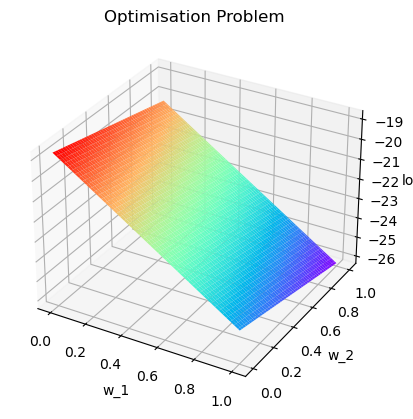

In [229]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, np.log(z), cmap='rainbow')
w1_history, w2_history = zip(*weight_history)
#ax.plot(w1_history, w2_history, loss_history, marker='o')


ax.set_title('Optimisation Problem')
ax.set_xlabel('w_1')
ax.set_ylabel('w_2')
ax.set_zlabel('loss')

#ax.view_init(0, 0, 0)

plt.show()

In [220]:
w2_history

(0.3462456647791072,
 0.3462456722850031,
 0.346245679790899,
 0.3462456872967949,
 0.3462456948026908,
 0.3462457023085867,
 0.3462457098144826,
 0.3462457173203785,
 0.3462457248262744,
 0.3462457323321703)